In [4]:
import pandas as pd
import numpy as np 
import math
import matplotlib as plt

# Simple compound interest

## Formula
![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTR92QD5hwMuatbFHF7CU_si9OcvkEgAeR9gA&usqp=CAU)

In [9]:
def Simple(P,r,n,t):
    """ A = Final 
        P =	initial principal balance
        r = interest rate  
        n = number of times interest per time period 
        t = number of time periods elapsed 
    """
    A = P*((1 + (r / n))**(n * t))
    

Final(30000,.10,1,10)
Final(0,.10,1,10)

77812.27380300008

# Compound interest with additional contributions 

## Formula
![](https://i.imgur.com/09bn8mN.png)

In [149]:
def Additoinal_CON_Final(P,r,c,t):
    """ A = Final 
        P =	initial principal balance
        r = interest rate  
        n = number of times interest per time period 
        t = number of time periods elapsed 
    """
    A = P*(1 + r)**t + c*(((1+r)**(t)-1)/r)
    print('Future Value',A,'Total Contibution:',c*t)
    print('Amount made(Future Value - Total Contibution):',A-c*t)


Future Value 48030.73002000007 Total Contibution: 33600
Amount made(Future Value - Total Contibution): 14430.730020000068


In [155]:
#===========
#Option A pay minimum of 400 and invest 350 per month for 8 years  
P = 0    
r = .1
c = 350 * 12
t = 8
Additoinal_CON_Final(P,r,c,t)

Future Value 48030.73002000007 Total Contibution: 33600
Amount made(Future Value - Total Contibution): 14430.730020000068


In [150]:
#Option B pay 750 per month and then invest 750 for 4 years 
c = 750 * 12
t = 4
Additoinal_CON_Final(P,r,c,t)

Future Value 41769.00000000003 Total Contibution: 36000
Amount made(Future Value - Total Contibution): 5769.000000000029


## Graph

,Future Value (10.0%),Total Contributions
Time (Years),,
0,30000,30000
1,69000,66000
2,111900,102000
3,159090,138000
4,210999,174000
5,268098,210000
6,330908,246000
7,399999,282000
8,475999,318000


<AxesSubplot:xlabel='Time (Years)'>

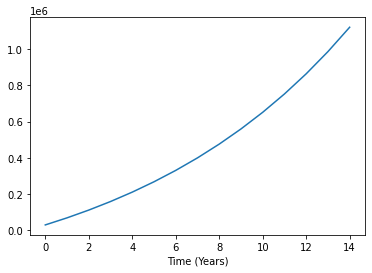

In [10]:
def Additoinal_CON(P,r,c,t):
    """ A = Final 
        P =	initial principal balance
        r = interest rate  
        n = number of times interest per time period 
        t = number of time periods elapsed 
        c = additional contribution
    """
    save = []
    con = []
   
    for t in range(0,time):
        con.append(P+c*t)
        A = P*(1 + r)**t + c*(((1+r)**(t)-1)/r)
        save.append(A)

    df = pd.DataFrame()
    df.index = df.index.rename('Time (Years)')
    #df['Time (Years)'] = [x for x in range(0,time)]
    df[f'Future Value ({r * 100 }%)'] = save
    #df[f'Future Value ({r * 100 }%)'] = df[f'Future Value ({r * 100 }%)'].astype('int64') #Converts Scientific notion into 
    df['Total Contributions'] = con 
    
    display(df.astype('int64'))
    display(df[f'Future Value ({r * 100 }%)'].astype('int64').plot())

#==============================================================
c = 36000
P = 30000
r = .10
n = 1
t = 15
Additoinal_CON(P,r,c,t)

# Compound interest with additional contributions that increase over the years 

,Future Value (10.0%),Total Contributions,Contributions,Contributions Change,Dividends (2%)
Time (Years),,,,,
0,30000,30000,36000,NaN,600
1,70800,67800,37800,0.05,1416
2,119649,109380,39690,0.05,2392
3,191009,166930,45643,0.15,3820
4,266346,221702,47925,0.05,5326
5,355535,281609,50321,0.05,7110
6,499651,377221,57870,0.15,9993
7,634937,455346,60763,0.05,12698
8,793939,540415,63801,0.05,15878


<AxesSubplot:xlabel='Time (Years)'>

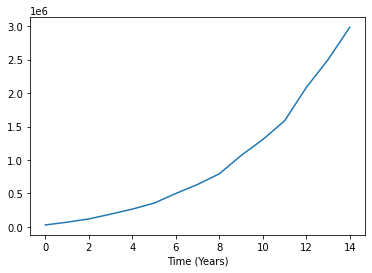

In [13]:
def Add_Con_Pay_Raise(P,r,c,t):
    """ A = Final 
        P =	initial principal balance
        r = interest rate  
        n = number of times interest per time period 
        t = number of time periods elapsed 
        c = additional contribution
    """
    save = []
    con = []
    Con1 = []
    for t in range(0,time):
        con.append(P+c*t)
        A = P*(1 + r)**t + c*(((1+r)**(t)-1)/r)
        time2 = t + 1
        Con1.append(c)
        if time2 % 3 == 0:
            c = c * 1.15
        else:
            c = c * 1.05
        save.append(A)

    df = pd.DataFrame()
    df.index = df.index.rename('Time (Years)')
    #df['Time (Years)'] = [x for x in range(0,time)]
    df[f'Future Value ({r * 100 }%)'] = save
    df['Total Contributions'] = con 
    df['Contributions'] = Con1
    df['Contributions Change'] = df['Contributions'].pct_change()
    #print(type(df['Contributions Change']))
    #df['Contriution increase'] = df['Pay increase'] - df['Pay increase'].shift(1)
    df['Dividends (2%)'] = df[f'Future Value ({r * 100 }%)'] * .02
    #df['New'] = df['Contributions Change'].apply(lambda x: 'Promotion' if float(x) == '0.05' else 'Yearly Raise1' )
    #df['New 2'] = np.where(df['Contributions Change'] == .05,'Yes','No')
    display(df.astype('int64',errors = 'ignore'))
    return(df[f'Future Value ({r * 100 }%)'].plot())

#==============================================================
c = 36000
P = 30000
r = .10
n = 1
time = 15
Add_Con_Pay_Raise(P,r,c,t)

# Amortization 